### Stats 131 Project - Carl Lejerskar

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as scs

#### Reading Data

In [2]:
df = pd.read_csv('MentalHealthSurvey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Data Cleanup

#### Age

In [4]:
test = np.array(df['Age'])
print(min(test))
print(max(test))
print(test[test<=0])

df.loc[df['Age'] == -29,'Age']

df.loc[143,'Age'] = 29

df = df.loc[df['Age'] != -1,:]
df = df.loc[df['Age'] != -1726,:]
df = df.loc[df['Age'] != 5,:]
df = df.loc[df['Age'] != 8,:]
df = df.loc[df['Age'] != 11,:]
df = df.loc[df['Age'] != 329,:]
df = df.loc[df['Age'] != 99999999999,:]

-1726
99999999999
[  -29 -1726    -1]


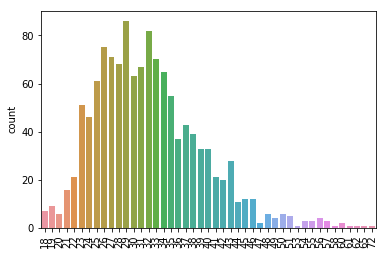

In [5]:
plt.xticks(rotation=90)
sns.countplot(x=np.array(df['Age']))


In [6]:
max(df['Age'])

72

In [7]:
def cat(x):
    if (x <= 20):
        return "<=20"
    if (x > 20 and x <= 24):
        return "21-24"
    if (x > 24 and x <= 30):
        return "24-30"
    if (x > 30 and x <= 35):
        return "30-35"
    if (x > 35 and x <= 40):
        return "36-40"
    if (x > 40 and x <= 45):
        return "41-45"
    if (x > 45 and x <= 50):
        return "46-45"
    if (x > 50 and x <= 55):
        return "51-55"
    if (x > 55 and x <= 60):
        return "56-60"
    if (x > 60 and x <= float('Inf')):
        return "Older than 60"



df['Age'] = df['Age'].apply(lambda x: cat(x))

df['Age'].unique()


array(['36-40', '41-45', '30-35', '21-24', '24-30', '46-45', '<=20',
       '56-60', '51-55', 'Older than 60'], dtype=object)

#### Gender

In [8]:
df.Gender.unique()
df.Gender = df.Gender.str.lower()

In [9]:

d = dict.fromkeys(("male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"),'male')
d1 = dict.fromkeys(("trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"),'trans')
d2 = dict.fromkeys(("cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"),'female')
d.update(d1)
d.update(d2)
print(d)


{'male': 'male', 'm': 'male', 'male-ish': 'male', 'maile': 'male', 'mal': 'male', 'male (cis)': 'male', 'make': 'male', 'male ': 'male', 'man': 'male', 'msle': 'male', 'mail': 'male', 'malr': 'male', 'cis man': 'male', 'cis male': 'male', 'trans-female': 'trans', 'something kinda male?': 'trans', 'queer/she/they': 'trans', 'non-binary': 'trans', 'nah': 'trans', 'all': 'trans', 'enby': 'trans', 'fluid': 'trans', 'genderqueer': 'trans', 'androgyne': 'trans', 'agender': 'trans', 'male leaning androgynous': 'trans', 'guy (-ish) ^_^': 'trans', 'trans woman': 'trans', 'neuter': 'trans', 'female (trans)': 'trans', 'queer': 'trans', 'ostensibly male, unsure what that really means': 'trans', 'cis female': 'female', 'f': 'female', 'female': 'female', 'woman': 'female', 'femake': 'female', 'female ': 'female', 'cis-female/femme': 'female', 'female (cis)': 'female', 'femail': 'female'}


In [10]:
def group_gender(gen):

    
    d = dict.fromkeys(("male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"),'male')
    d1 = dict.fromkeys(("trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"),'trans')
    d2 = dict.fromkeys(("cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"),'female')
    d.update(d1)
    d.update(d2)
    try:
        return d[gen]
    except:
        return gen
    

In [11]:
df['Gender'] = df['Gender'].apply(group_gender)


In [12]:
df= df.loc[df['Gender'] != 'a little about you',:]
df= df.loc[df['Gender'] != 'p',:]

In [13]:
df['Gender'].unique()

array(['female', 'male', 'trans'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1252 non-null object
Age                          1252 non-null object
Gender                       1252 non-null object
Country                      1252 non-null object
state                        739 non-null object
self_employed                1234 non-null object
family_history               1252 non-null object
treatment                    1252 non-null object
work_interfere               989 non-null object
no_employees                 1252 non-null object
remote_work                  1252 non-null object
tech_company                 1252 non-null object
benefits                     1252 non-null object
care_options                 1252 non-null object
wellness_program             1252 non-null object
seek_help                    1252 non-null object
anonymity                    1252 non-null object
leave                        1252 non-null ob

In [15]:
df.fillna('No Response', inplace=True) #NA most likely shows no response, may be of value

#### Country

In [16]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

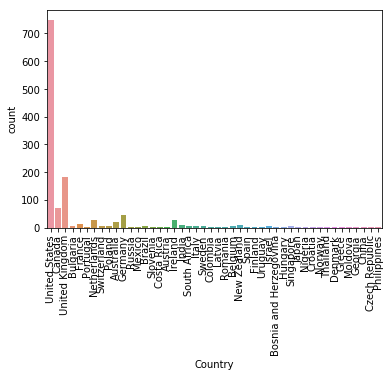

In [17]:
plt.xticks(rotation=90)
sns.countplot(df.Country)

In [18]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,36-40,female,United States,IL,No Response,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,No Response
1,2014-08-27 11:29:37,41-45,male,United States,IN,No Response,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,No Response
2,2014-08-27 11:29:44,30-35,male,Canada,No Response,No Response,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,No Response
3,2014-08-27 11:29:46,30-35,male,United Kingdom,No Response,No Response,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No Response
4,2014-08-27 11:30:22,30-35,male,United States,TX,No Response,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No Response
5,2014-08-27 11:31:22,30-35,male,United States,TN,No Response,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,No Response
6,2014-08-27 11:31:50,30-35,female,United States,MI,No Response,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,No Response
7,2014-08-27 11:32:05,36-40,male,Canada,No Response,No Response,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,No Response
8,2014-08-27 11:32:39,41-45,female,United States,IL,No Response,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,No Response
9,2014-08-27 11:32:43,21-24,male,Canada,No Response,No Response,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,No Response


In [19]:
def group_country(gen): 
    d = dict.fromkeys(('United States'),'US')
    d1 = dict.fromkeys(('Canada'),'Canada')
    d2 = dict.fromkeys(('United Kingdom'),'North America')
    d3 = dict.fromkeys(('Germany'),'Germany')
    d4 = dict.fromkeys(('Mexico'),'Other')
    d5 = dict.fromkeys(('Australia','New Zealand'),'Other')
    d6 = dict.fromkeys(('Czech Republic','Denmark', 'Greece', 'Moldova','Croatia', 'Norway','Bosnia and Herzegovina','Finland','Spain','Latvia', 'Romania', 'Belgium','Italy', 'Sweden','Austria', 'Ireland','Slovenia', 'Bulgaria', 'France','Portugal', 'Netherlands', 'Switzerland', 'Poland',),'Other')
    d7 = dict.fromkeys(('Georgia','Philippines','China','Thailand','Hungary', 'Singapore', 'Japan','Russia','India','Israel'),'Other')
    d8 = dict.fromkeys(('Costa Rica'),'Other')
    d9 = dict.fromkeys(('Brazil','Colombia'),'Other')
    d10 = dict.fromkeys(('South Africa','Nigeria'),'Other')
    d.update(d1)
    d.update(d2)
    d.update(d3)
    d.update(d4)
    d.update(d5)
    d.update(d6)
    d.update(d7)
    d.update(d8)
    d.update(d9)
    d.update(d10)

    try:
        return d[gen]
    except:
        return gen
    


In [20]:
# def group_country(gen): 
#     d = dict.fromkeys(('United States','Canada','Mexico'),'US')
#     d1 = dict.fromkeys(('Australia','New Zealand'),'Australia')
#     d2 = dict.fromkeys(('Czech Republic','Denmark', 'Greece', 'Moldova','Croatia', 'Norway','Bosnia and Herzegovina','Finland','Spain','Latvia', 'Romania', 'Belgium','Italy', 'Sweden','Austria', 'Ireland','Slovenia','United Kingdom', 'Bulgaria', 'France','Portugal', 'Netherlands', 'Switzerland', 'Poland','Germany'),'Europe')
#     d3 = dict.fromkeys(('Georgia','Philippines','China','Thailand','Hungary', 'Singapore', 'Japan','Russia','India','Israel'),'Asia')
#     d4 = dict.fromkeys(('Costa Rica'),'Central America')
#     d5 = dict.fromkeys(('Brazil','Colombia'),'South America')
#     d6 = dict.fromkeys(('South Africa','Nigeria'),'Africa')
#     d.update(d1)
#     d.update(d2)
#     d.update(d3)
#     d.update(d4)
#     d.update(d5)
#     d.update(d6)

#     try:
#         return d[gen]
#     except:
#         return gen
    

In [21]:
df['Country'] = df['Country'].apply(group_country)


#### Cleaning Date (Getting Hour) (it is useful according to cross validation)

In [22]:
df.Timestamp = pd.to_datetime(df.Timestamp,infer_datetime_format=True)

In [1]:
df['Hour'] = df.Timestamp.dt.hour

NameError: name 'df' is not defined

#### Comments (Making Binary 1/0) (Not Useful!)

In [24]:
#df.comments.unique()

In [25]:
df.loc[df['comments'] != 'No Response','comments1'] = 1
df.loc[df['comments'] == 'No Response','comments1'] = 0

#### Comments

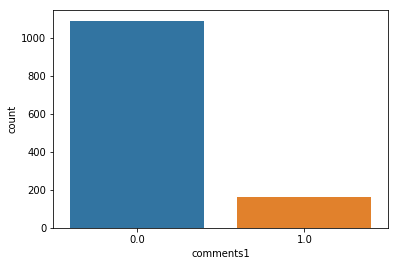

In [26]:
sns.countplot(df.comments1)

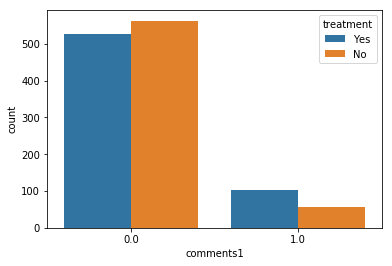

In [27]:
sns.countplot(df.comments1,hue=df.treatment)

In [28]:
test = df.loc[df.comments1==1, ['comments','treatment']]

In [29]:
#test.loc[test['treatment']=='No','comments'].unique()

#### State

In [30]:
# def group_state(gen): 
   


#     d = dict.fromkeys(('CA','WA','OR'),'West Coast')
#     d1 = dict.fromkeys(('IL','IN','MI','OH','IA','WI','MN','NE','OK','SD','WY'),'Mid-West')
#     d2 = dict.fromkeys(('TX','TN','NC','FL', 'GA','DC','WV','KS','VA','KY','AL','SC','MS','LA'),'South')
#     d3 = dict.fromkeys(('CT','MD','NY','MA','PA','NH', 'NJ','VT','RI','ME'),'East')
#     d4 = dict.fromkeys(('UT','NM','MO','AZ', 'CO','NV','ID'),'West')
#     d.update(d1)
#     d.update(d2)
#     d.update(d3)
#     d.update(d4)


#     try:
#         return d[gen]
#     except:
#         return gen
    

In [31]:
# df['state'] = df['state'].apply(group_state)



In [32]:
##Removing Timestamp, State, Comment
df.drop(df.columns[[0,4,26]], axis=1, inplace=True)

### Feature Engineering

In [33]:
df.loc[(df['family_history']=='Yes') & (df['work_interfere'].isin(['Often','Rarely','Sometimes'])),'MostLikely'] = 1
df.loc[df.MostLikely != 1, 'MostLikely'] = 0

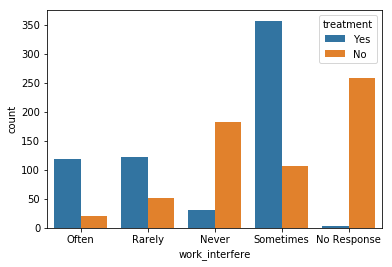

In [34]:
sns.countplot(df.work_interfere,hue=df.treatment)

#### Converting Categorical Variables to Categorical

In [35]:
for i in range(1, 26): #converting features to categorical
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])

### Data Exploration

#### Treatment - Response Variable

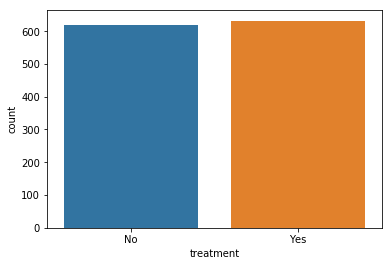

In [36]:
sns.countplot(df.treatment)

##### Near equal amount of people have sought treatment versus those who havent.

#### Gender

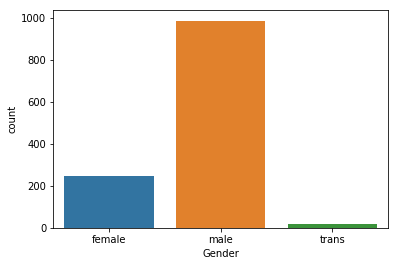

In [37]:
sns.countplot(df.Gender)

#### Mainly male respondents, few females and very low amount of trans respondents.

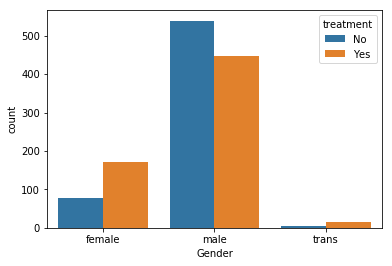

In [38]:
sns.countplot(df.Gender, hue=df.treatment)

#### Seems that females and trans seek treatment more than not, while males do not seek treatment more than not.

#### Family History

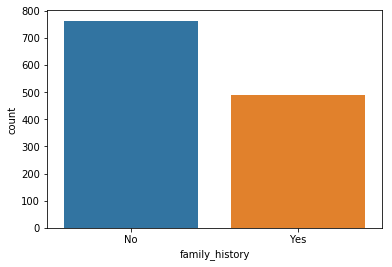

In [39]:
sns.countplot(df.family_history)

##### Most people have no family history, but a sizeable chunk has family history. do not have a family history of mental illness.

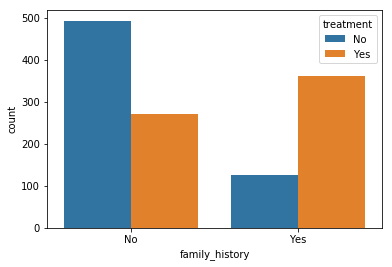

In [40]:
sns.countplot(df.family_history, hue = df.treatment)

##### Those who have a family history seek treatment much more than those who do not. This seems obvious, as you would only seek treatment if you have a mental illness, and family history can make you more likely to have mental illness.

#### Work_Interfere

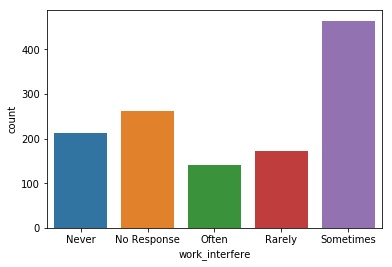

In [41]:
sns.countplot(df.work_interfere)

##### Most people say mental illness interferes with work sometimes, second most no response, third most never, fourth most rarely, and the minority of people say it affects their work often.

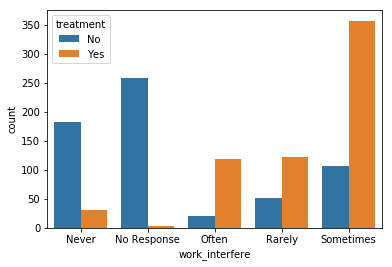

In [42]:
sns.countplot(df.work_interfere, hue = df.treatment)

##### Seems that those who never have work interference do not seek treatment, which is understandable. Those who rarely, sometimes, or often have work interference do seek treatment. It seems that nearly all of the persons who did not respond did not seek treatment. These people may not be taking this survey as seriously as they do not have a mental illness, making them less inclined to even respond to questions. It was probably a good idea to fill NA's this way!

#### remote_work

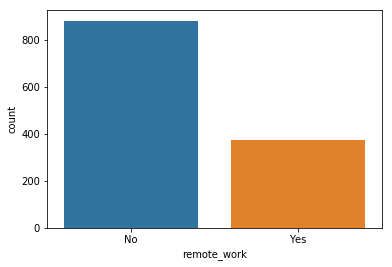

In [43]:
sns.countplot(df.remote_work)

##### Most people do not work remotely, but a sizeable chunk do.

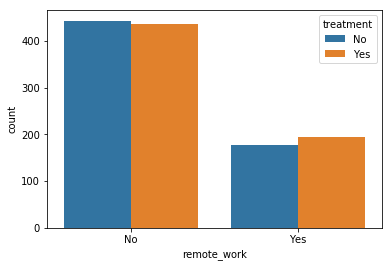

In [44]:
sns.countplot(df.remote_work,hue=df.treatment)

##### Seems that distribution of treatment is similar between those who work remotely and those who do not.

#### self_employed

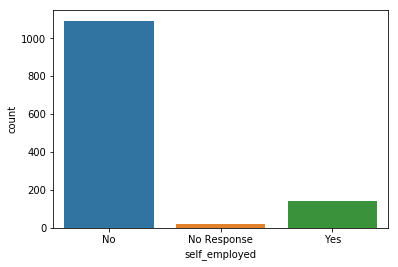

In [45]:
sns.countplot(df.self_employed)

##### Most people are not self_employed

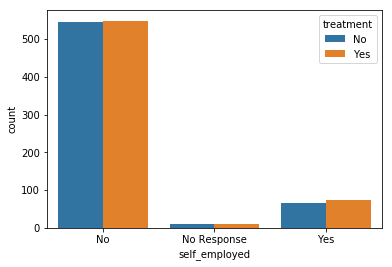

In [46]:
sns.countplot(df.self_employed, hue = df.treatment)

##### Seems to be similar distribution of treatment on those who are self employed, those who are not, and those who do not respond.

#### tech_company

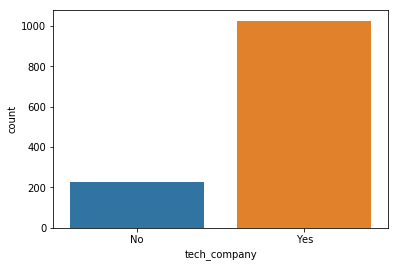

In [47]:
sns.countplot(df.tech_company)

##### Seems that most people are working for a tech company!

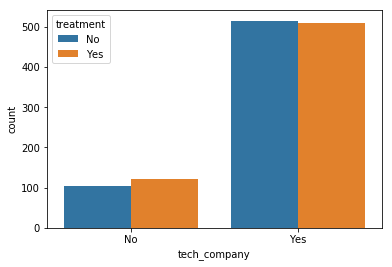

In [48]:
sns.countplot(df.tech_company, hue = df.treatment)

##### Distribution of treatment seems very similar for those who do and do not work for a tech company!

#### Benefits

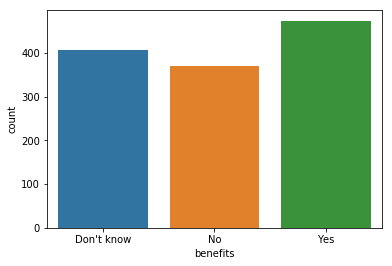

In [49]:
sns.countplot(df.benefits)

##### Most people responded with yes, second most don't know, and third most no.

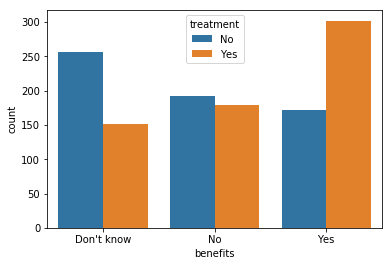

In [50]:
sns.countplot(df.benefits, hue=df.treatment)

##### Those who have employers that provide mental health benefits seek treatment much more than not. Those who do not know clearly seek treatment much less. Those who do not have mental health benefits as an employee seem to have a near equal distribution of seeking versus not seeking treatment.

#### care_options

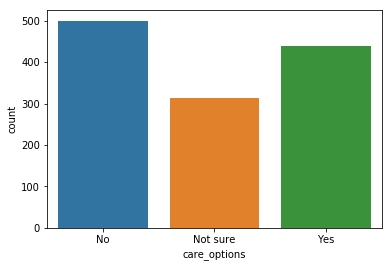

In [51]:
sns.countplot(df.care_options)

##### Most people responded with no, second most yes, and third most not sure.

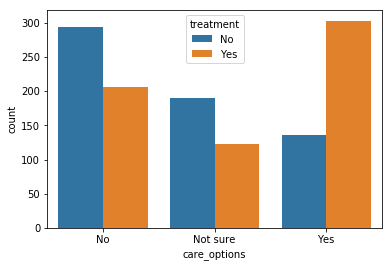

In [52]:
sns.countplot(df.care_options, hue=df.treatment)

##### Those who know the options for care seek treatment more frequently than not, those who do not know and those who are not sure have similar distributions of treatment, where they do not seek treatment more often than do.

#### wellness_program

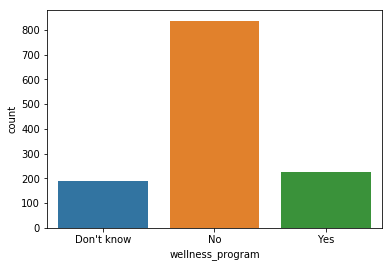

In [53]:
sns.countplot(df.wellness_program)

##### Most people responded with no, second most yes, and third most Don't know.

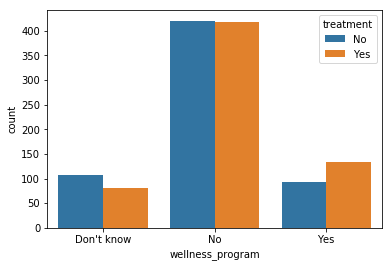

In [54]:
sns.countplot(df.wellness_program, hue=df.treatment)

##### Those who have employers that have not discussed mental health as a part of a wellness program equally do and do not seek treatment, those who do have employers seek treatment more than not, and those that do not know do not seek treatment more than do.

#### seek_help

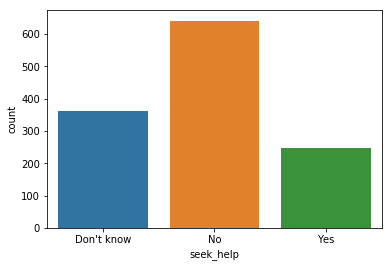

In [55]:
sns.countplot(df.seek_help)

##### Most people responded with no, second most don't know, and third most yes.

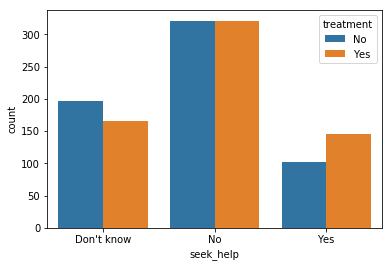

In [56]:
sns.countplot(df.seek_help, hue=df.treatment)

##### Those who do have employer provided resources to seek help seek treatment more than not, those who do not know do not seek treatment more than do, and those who do not have employee provided resources seek treatment as much as they do not seek treatment.

#### Anonymity

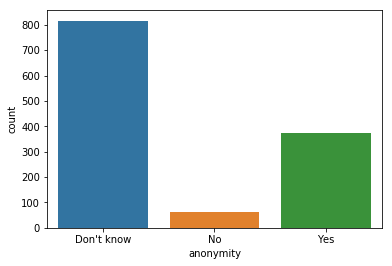

In [57]:
sns.countplot(df.anonymity)

##### Most people responded with don't know, second most yes, and a minority no.

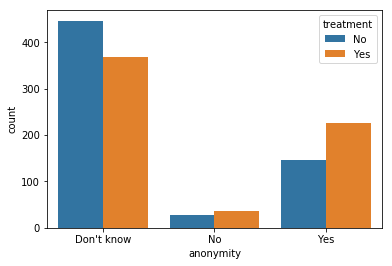

In [58]:
sns.countplot(df.anonymity, hue=df.treatment)

##### Those who have their anonymity protected if they seek mental health treatment/substance abuse programs seek treatment more than not, those who do not know do seek treatment less than they do, and, interestingly, those who do not have their anonymity protected still seek treatment more than not.

#### mental_health_consequence

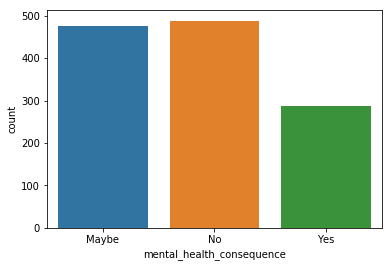

In [59]:
sns.countplot(df.mental_health_consequence)

#####

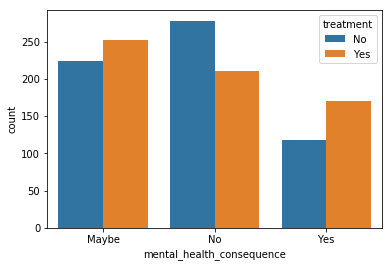

In [60]:
sns.countplot(df.mental_health_consequence, hue=df.treatment)

##### 

#### Hour

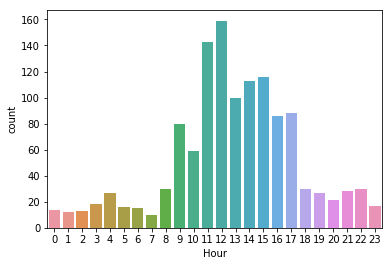

In [61]:
sns.countplot(df.Hour)

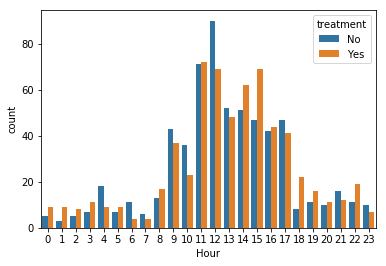

In [62]:
sns.countplot(df.Hour,hue=df.treatment)

#### CoWorkers

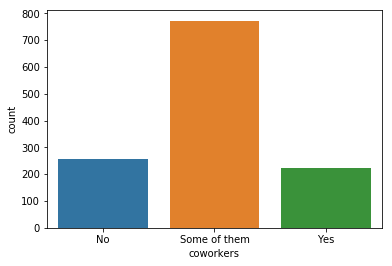

In [63]:
sns.countplot(df.coworkers)

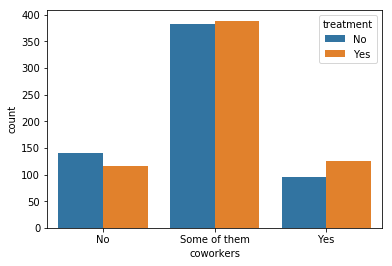

In [64]:
sns.countplot(df.coworkers,hue=df.treatment)

#### Supervisor

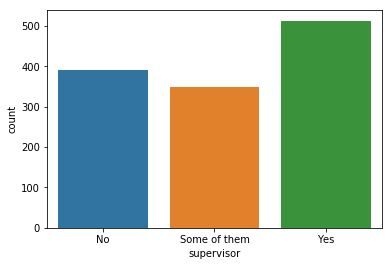

In [65]:
sns.countplot(df.supervisor)

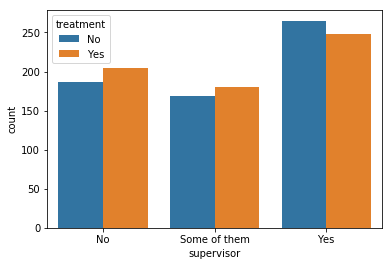

In [66]:
sns.countplot(df.supervisor,hue=df.treatment)

#### mental_health_interview

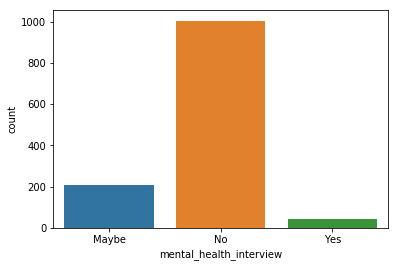

In [67]:
sns.countplot(df.mental_health_interview)

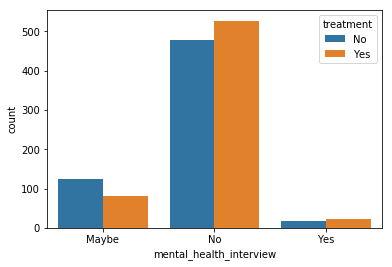

In [68]:
sns.countplot(df.mental_health_interview,hue=df.treatment)

#### phys_health_interview

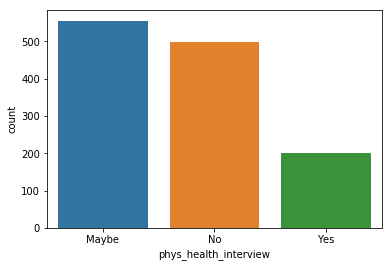

In [69]:
sns.countplot(df.phys_health_interview)

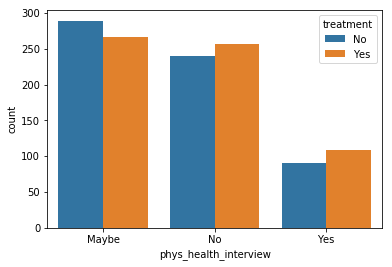

In [70]:
sns.countplot(df.phys_health_interview,hue=df.treatment)

#### mental_vs_physical

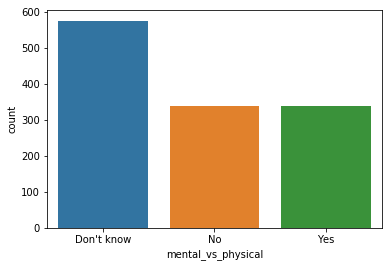

In [71]:
sns.countplot(df.mental_vs_physical)

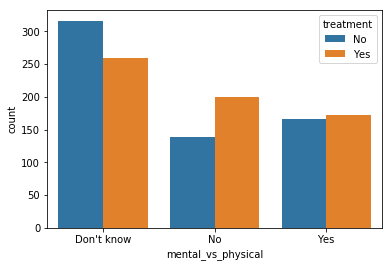

In [72]:
sns.countplot(df.mental_vs_physical,hue=df.treatment)

#### obs_consequence

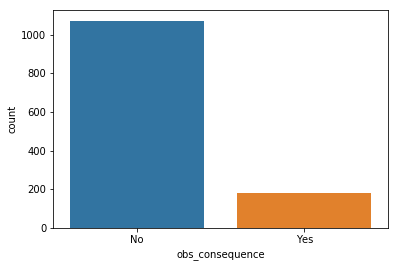

In [73]:
sns.countplot(df.obs_consequence)

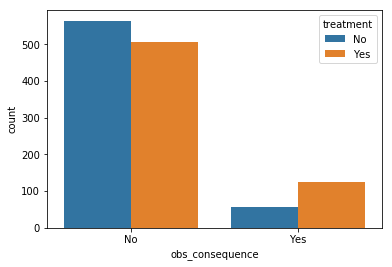

In [74]:
sns.countplot(df.obs_consequence,hue=df.treatment)

In [75]:
print(df.shape)
df.columns

(1252, 27)


Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Hour', 'comments1',
       'MostLikely'],
      dtype='object')

#### Since this is about mental illness in the tech industry, a chi squared test is ran as shown above. This is then done for all variables below:

#### Building Models

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.grid_search import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Pre Data Processing - Encoding

In [82]:
df2 = df 
#from python kernel on Kaggle
#df2[df2.columns.difference(['Age'])].columns
labelDict = {}
for feature in df2:
    le = preprocessing.LabelEncoder()
    le.fit(df2[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df2[feature] = le.transform(df2[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
label_Gender [0, 1, 2]
label_Country [0, 1, 2, 3, 4, 5, 6, 7]
label_self_employed [0, 1, 2]
label_family_history [0, 1]
label_treatment [0, 1]
label_work_interfere [0, 1, 2, 3, 4]
label_no_employees [0, 1, 2, 3, 4, 5]
label_remote_work [0, 1]
label_tech_company [0, 1]
label_benefits [0, 1, 2]
label_care_options [0, 1, 2]
label_wellness_program [0, 1, 2]
label_seek_help [0, 1, 2]
label_anonymity [0, 1, 2]
label_leave [0, 1, 2, 3, 4]
label_mental_health_consequence [0, 1, 2]
label_phys_health_consequence [0, 1, 2]
label_coworkers [0, 1, 2]
label_supervisor [0, 1, 2]
label_mental_health_interview [0, 1, 2]
label_phys_health_interview [0, 1, 2]
label_mental_vs_physical [0, 1, 2]
label_obs_consequence [0, 1]
label_Hour [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
label_comments1 [0, 1]
label_MostLikely [0, 1]


In [78]:
len(df2.columns)

27

In [79]:
# sigvar = []
# for i in df2.columns[0:27]:
#     cont = pd.crosstab(df['treatment'],df[i])
#     scs.chi2_contingency(cont)[1]
#     if scs.chi2_contingency(cont)[1] <=0.05:
#         print('The variable',i,'is significantly different according to the Chi Squared Test')
#         sigvar.append(i)

The variable Gender is significantly different according to the Chi Squared Test
The variable Country is significantly different according to the Chi Squared Test
The variable family_history is significantly different according to the Chi Squared Test


ValueError: Duplicated level name: "treatment", assigned to level 1, is already used for level 0.

In [80]:
# df2 = df2[sigvar]

# df2.drop(['Country','comments1'],axis=1, inplace=True)

KeyError: "labels ['comments1'] not contained in axis"

In [84]:
df2.drop(['Country','comments1','MostLikely'],axis=1, inplace=True)

#### Training and Testing Split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df2[df2.columns.difference(['treatment'])], df2.treatment,test_size = 0.3, random_state = 1, stratify = df2.treatment)

#### Fitting Model - Random Forest

#### Best Parameters:

In [86]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, min_samples_split=2)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Testing Model - Random Forest

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))


array([[140,  46],
       [ 14, 176]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf.predict(X_test))

0.8404255319148937

In [89]:
print(y_test.value_counts())
print(190/(186+190)) #accuracy is better than baseline, marking everything 1

1    190
0    186
Name: treatment, dtype: int64
0.5053191489361702


In [90]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [91]:
feature_importances

,importance
work_interfere,0.315241
Hour,0.078440
family_history,0.073415
care_options,0.054278
Age,0.046090
no_employees,0.043972
benefits,0.038275
leave,0.036674
supervisor,0.028173
mental_health_consequence,0.027928


23


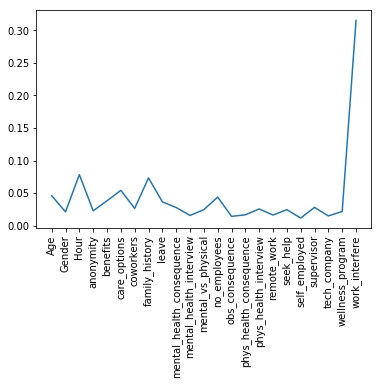

In [93]:
importances = rf.feature_importances_
print(len(importances))
my_xticks = X_train.columns
x = range(0, 23)
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.plot(x, importances)
plt.show()


#### Five-Folds Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #rs 42 gave good results
rf.fit(X_train, y_train)
cv_results = cross_val_score(rf, X_test, y_test, cv = 5)  # 5 fold cross validation

print(cv_results) #consistent results
print(cv_results.mean()) 

[0.88157895 0.78666667 0.81333333 0.84       0.81333333]
0.8269824561403508


#### Decision Tree Classifier

In [96]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=3, max_features=9, criterion='gini', min_samples_leaf=8)

In [97]:
tree.fit(X_train, y_train)
print(confusion_matrix(y_test, tree.predict(X_test)))
accuracy_score(y_test, tree.predict(X_test))

[[131  55]
 [  4 186]]


0.8430851063829787

In [98]:
cv_results = cross_val_score(tree, X_test, y_test, cv = 5)  # 5 fold cross validation

print(cv_results)
print(cv_results.mean()) #low mean CV

[0.75       0.84       0.8        0.74666667 0.69333333]
0.7659999999999999


23


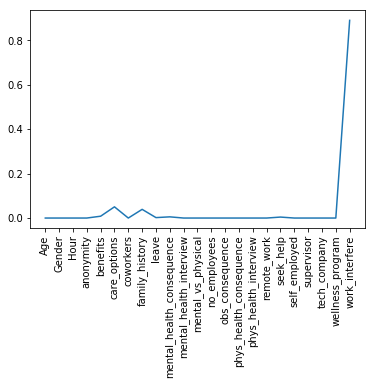

In [100]:
importancestree = tree.feature_importances_
print(len(importancestree))
my_xticks = X_train.columns
x = range(0, 23)
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.plot(x, importancestree)
plt.show()


#### Fitting Model - KNN

In [101]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
print(confusion_matrix(y_test, knn.predict(X_test)))
accuracy_score(y_test, knn.predict(X_test))



[[130  56]
 [ 24 166]]


0.7872340425531915

In [102]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
cv_results = cross_val_score(knn, X_test, y_test, cv = 5)  # 5 fold cross validation

print(cv_results)
print(cv_results.mean())

[0.85526316 0.78666667 0.72       0.82666667 0.69333333]
0.7763859649122806


#### Fitting Model - Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
print(confusion_matrix(y_test, logr.predict(X_test)))
accuracy_score(y_test, logr.predict(X_test))

[[140  46]
 [ 19 171]]


0.8271276595744681

In [104]:
cv_results = cross_val_score(logr, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

[0.88157895 0.77333333 0.77333333 0.8        0.82666667]
0.810982456140351


#### Fitting Model - Boosted Trees

In [111]:
import xgboost as xgb

In [149]:
gbm = xgb.XGBClassifier(max_depth=2, n_estimators=550, learning_rate=0.01).fit(X_train, y_train)
predictions = gbm.predict(X_test)

C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [150]:
print(confusion_matrix(y_test, gbm.predict(X_test)))
accuracy_score(y_test, gbm.predict(X_test))

[[135  51]
 [  8 182]]


C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8430851063829787

In [151]:
cv_results = cross_val_score(gbm, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

[0.90789474 0.82666667 0.8        0.85333333 0.82666667]
0.8429122807017546


C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [152]:
boostimp = gbm.get_booster().get_score(importance_type='weight')
boostimp

{'work_interfere': 577,
 'care_options': 148,
 'family_history': 203,
 'benefits': 85,
 'anonymity': 42,
 'mental_health_consequence': 45,
 'Hour': 148,
 'Gender': 103,
 'phys_health_interview': 22,
 'Age': 67,
 'obs_consequence': 40,
 'wellness_program': 9,
 'mental_health_interview': 29,
 'coworkers': 39,
 'seek_help': 31,
 'self_employed': 19,
 'phys_health_consequence': 32,
 'no_employees': 4,
 'leave': 7}

In [120]:
boostimp = pd.DataFrame.from_dict(boostimp, orient='index')
boostimp = boostimp.rename(index=str,columns={0:'XGBImportance'})

In [121]:
boostimp.sort_values('XGBImportance',ascending=False)

importance = boostimp
importance['RFImportance'] = feature_importances.importance


In [122]:
importance.sort_values('XGBImportance', ascending = False)

importance.XGBImportance = importance.XGBImportance/np.sum(importance.XGBImportance)
importance.RFImportance = importance.RFImportance/np.sum(importance.RFImportance)

In [123]:
importance1 = importance.reset_index()
importance1 = pd.melt(importance1,id_vars='index')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

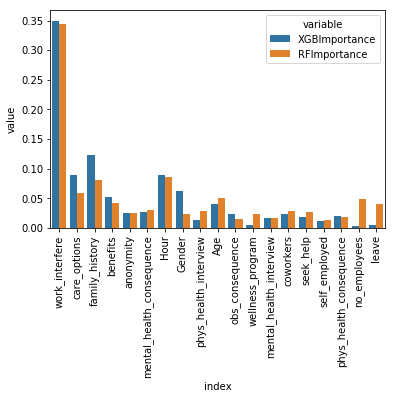

In [124]:
sns.barplot(x=importance1['index'],y=importance1['value'],hue=importance1['variable'])
plt.xticks(rotation=90)

#### Linear Model

In [125]:
from sklearn import linear_model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(confusion_matrix(y_test, lr.predict(X_test)))
accuracy_score(y_test, lr.predict(X_test))

[[140  46]
 [ 19 171]]


0.8271276595744681

In [129]:
cv_results = cross_val_score(lr, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

[0.88157895 0.77333333 0.77333333 0.8        0.82666667]
0.810982456140351


#### LDA

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print(confusion_matrix(y_test, lda.predict(X_test)))
accuracy_score(y_test, lda.predict(X_test))

[[141  45]
 [ 19 171]]


0.8297872340425532

In [130]:
cv_results = cross_val_score(lda, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

[0.85526316 0.81333333 0.77333333 0.82666667 0.81333333]
0.8163859649122808


In [131]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print(confusion_matrix(y_test, nb.predict(X_test)))
accuracy_score(y_test, nb.predict(X_test))

[[131  55]
 [ 34 156]]


0.7632978723404256

In [132]:
cv_results = cross_val_score(nb, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

[0.86842105 0.76       0.77333333 0.76       0.77333333]
0.7870175438596492


In [133]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
print(confusion_matrix(y_test, nb.predict(X_test)))
accuracy_score(y_test, nb.predict(X_test))

[[114  72]
 [ 36 154]]


0.7127659574468085

In [134]:
cv_results = cross_val_score(nb, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

[0.75       0.61333333 0.73333333 0.66666667 0.72      ]
0.6966666666666667


In [135]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
print(confusion_matrix(y_test, nb.predict(X_test)))
accuracy_score(y_test, nb.predict(X_test))

[[135  51]
 [ 17 173]]


0.8191489361702128

In [136]:
cv_results = cross_val_score(nb, X_test, y_test, cv = 5)  # 5 fold cross validation
cv_results
print(cv_results)
print(cv_results.mean())

[0.89473684 0.74666667 0.73333333 0.78666667 0.81333333]
0.7949473684210526


In [144]:
from sklearn import tree as treep
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier(treep.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=200)
bdt.fit(X_train, y_train)
print(confusion_matrix(y_test, bdt.predict(X_test)))
accuracy_score(y_test, bdt.predict(X_test))

[[141  45]
 [ 17 173]]


0.8351063829787234

In [145]:
cv_results = cross_val_score(bdt, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

[0.77631579 0.8        0.72       0.81333333 0.8       ]
0.7819298245614036


In [165]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', logr), ('rf', rf), ('xgboost', gbm), ('knn',knn)], voting='hard')

In [166]:
eclf1.fit(X_train, y_train)
print(confusion_matrix(y_test, eclf1.predict(X_test)))
accuracy_score(y_test, eclf1.predict(X_test))

[[142  44]
 [ 15 175]]


C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

0.8430851063829787

In [167]:
cv_results = cross_val_score(eclf1, X_test, y_test, cv = 5)  # 5 fold cross validation
print(cv_results)
print(cv_results.mean())

C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

[0.92105263 0.82666667 0.77333333 0.88       0.81333333]
0.8428771929824561


C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
